In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Read and analyze the data
d = "C:\\Users\\bharath kumar\\Downloads\\Breast_cancer.csv"
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(d, header=None, names=column_names)
data = data.drop(columns=['ID'])  # Drop ID column

print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
            Diagnosis     Feature_1       Feature_2  Feature_3  \
id        radius_mean  texture_mean  perimeter_mean  area_mean   
842302          17.99         10.38           122.8       1001   
842517          20.57         17.77           132.9       1326   
84300903        19.69         21.25             130       1203   
84348301        11.42         20.38           77.58      386.1   

                Feature_4         Feature_5       Feature_6  \
id        smoothness_mean  compactness_mean  concavity_mean   
842302             0.1184            0.2776          0.3001   
842517            0.08474           0.07864          0.0869   
84300903           0.1096            0.1599          0.1974   
84348301           0.1425            0.2839          0.2414   

                    Feature_7      Feature_8               Feature_9  ...  \
id        concave points_mean  symmetry_mean  fractal_dimension_mean  ...   
842302                 0.1471         0

In [5]:
# 2. Split the dataset into train and test sets
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 3. Check shape of training and test sets
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (456, 30)
Shape of test set: (114, 30)


In [9]:
from sklearn.preprocessing import StandardScaler

# Ensure X_train and X_test are numeric
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Print the scaled data shapes to confirm
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)


Scaled training set shape: (456, 30)
Scaled test set shape: (114, 30)


C:\Users\bharath kumar\anaconda\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\bharath kumar\anaconda\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\bharath kumar\anaconda\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [10]:
# 5. Calculate the % of missing values in a column
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Diagnosis       0.0
Feature_1       0.0
Feature_2       0.0
Feature_3       0.0
Feature_4       0.0
Feature_5       0.0
Feature_6       0.0
Feature_7       0.0
Feature_8       0.0
Feature_9       0.0
Feature_10      0.0
Feature_11      0.0
Feature_12      0.0
Feature_13      0.0
Feature_14      0.0
Feature_15      0.0
Feature_16      0.0
Feature_17      0.0
Feature_18      0.0
Feature_19      0.0
Feature_20      0.0
Feature_21      0.0
Feature_22      0.0
Feature_23      0.0
Feature_24      0.0
Feature_25      0.0
Feature_26      0.0
Feature_27      0.0
Feature_28      0.0
Feature_29      0.0
Feature_30    100.0
dtype: float64


In [15]:
# 6. Remove features with missing values (>20%)
columns_to_drop = missing_percentage[missing_percentage > 20].index
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Print the columns dropped (if any) and the remaining columns
print("Columns dropped due to >20% missing values:", columns_to_drop)
print("Remaining columns after dropping:", data_cleaned.columns)

Columns dropped due to >20% missing values: Index(['Feature_30'], dtype='object')
Remaining columns after dropping: Index(['Diagnosis', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29'],
      dtype='object')


In [21]:
# 7. If the missing values are <20%, do data imputation (mean/median)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Print the data after imputation to verify
print("Data after imputation:")
print(data_imputed.head())

Data after imputation:
   Diagnosis  Feature_1   Feature_2    Feature_3  Feature_4  Feature_5  \
0  14.127292  19.289649   91.969033   654.889104    0.09636   0.104341   
1  17.990000  10.380000  122.800000  1001.000000    0.11840   0.277600   
2  20.570000  17.770000  132.900000  1326.000000    0.08474   0.078640   
3  19.690000  21.250000  130.000000  1203.000000    0.10960   0.159900   
4  11.420000  20.380000   77.580000   386.100000    0.14250   0.283900   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_20  Feature_21  \
0   0.088799   0.048919   0.181162   0.062798  ...    16.26919   25.677223   
1   0.300100   0.147100   0.241900   0.078710  ...    25.38000   17.330000   
2   0.086900   0.070170   0.181200   0.056670  ...    24.99000   23.410000   
3   0.197400   0.127900   0.206900   0.059990  ...    23.57000   25.530000   
4   0.241400   0.105200   0.259700   0.097440  ...    14.91000   26.500000   

   Feature_22   Feature_23  Feature_24  Feature_25  Feature_26 

In [27]:
# 8. Remove the outliers (using Z-score)
z_scores = np.abs((data_imputed - data_imputed.mean()) / data_imputed.std())
data_no_outliers = data_imputed[(z_scores < 3).all(axis=1)]

In [28]:
# 9. Use sklearn VarianceThreshold to find the constant features and display the constant features
selector = VarianceThreshold()
selector.fit(data_no_outliers)
constant_features = [column for column, var in zip(data_no_outliers.columns, selector.variances_) if var == 0]
print("Constant features:", constant_features)

Constant features: []


In [29]:
# 10. Remove features with low variance
low_variance_threshold = 0.01  # Variance threshold can be adjusted
selector = VarianceThreshold(threshold=low_variance_threshold)
data_low_variance = selector.fit_transform(data_no_outliers)

In [30]:
# 11. Remove highly correlated features
correlation_matrix = pd.DataFrame(data_low_variance).corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
data_no_high_corr = pd.DataFrame(data_low_variance).drop(columns=highly_correlated_features)

In [26]:
# 12. Perform Univariate feature selection (SelectKBest, SelectPercentile)
X_new = SelectKBest(f_classif, k=10).fit_transform(data_no_high_corr, y)
print("Shape after SelectKBest:", X_new.shape)
X_percentile = SelectPercentile(f_classif, percentile=50).fit_transform(data_no_high_corr, y)
print("Shape after SelectPercentile:", X_percentile.shape)

ValueError: Found input variables with inconsistent numbers of samples: [496, 570]

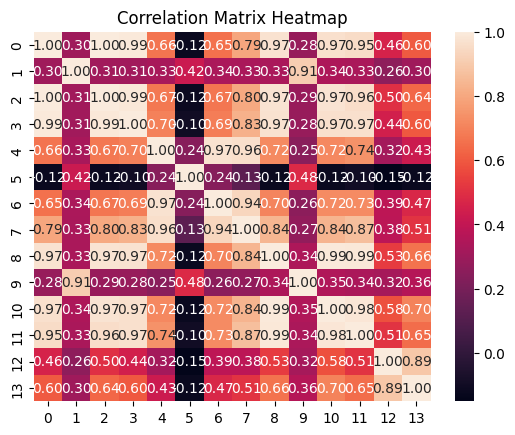

In [31]:
# 13. Apply Pearson Correlation Coefficient/Spearman’s rank coefficient and find Correlation-Matrix with Heatmap
correlation_matrix = pd.DataFrame(data_low_variance).corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:

# 14. Apply Principal Component Analysis (PCA) for matrix factorization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_no_high_corr)
print("Shape after PCA:", X_pca.shape)

Shape after PCA: (496, 2)


In [33]:
# 15. Apply Linear Discriminant Analysis (LDA) to perform feature extraction
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(data_no_high_corr, y)
print("Shape after LDA:", X_lda.shape)

ValueError: Found input variables with inconsistent numbers of samples: [496, 570]